In [1]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
def errors(n, r=1):
    
    mesh = UnitIntervalMesh(n)

    # start by solving for u using non-hybrid CG
    V = FunctionSpace(mesh, 'CG', r)
    bcs = [DirichletBC(V, Constant(0), DomainBoundary())]
    
    u = TrialFunction(V)
    v = TestFunction(V)
    a = inner(grad(u), grad(v))*dx
    f = Expression("pow(pi,2)*sin(pi*x[0])", degree=r+1)
    L = f*v*dx
    
    u = Function(V)
    solve(a == L, u, bcs)
    
    neg_grad_u = project(-grad(u), VectorFunctionSpace(mesh, "DG", r-1))
    
    # post-process to get s
    S_element = VectorElement('CG', mesh.ufl_cell(), r+1)
    V_dg_element = FiniteElement('DG', mesh.ufl_cell(), r)
    W = FunctionSpace(mesh, S_element*V_dg_element)
    s, lam = TrialFunctions(W)
    t, v = TestFunctions(W)
    a = (inner(s, t) + inner(div(s), div(t)) + div(lam*t + s*v) + 1e-10*inner(lam,v))*dx
    L = (f*(div(t) + v) + inner(neg_grad_u, t + grad(v)))*dx

    w = Function(W)
    solve(a == L, w)
    s = w.sub(0)
    
    # exact solutions
    u_exact = Expression("sin(pi*x[0])", degree=r+3)
    s_exact = Expression(("-pi*cos(pi*x[0])",), degree=r+4)

    u_error = errornorm(u_exact, u)
    grad_u_error = errornorm(s_exact, neg_grad_u)
    s_error = errornorm(s_exact, s)

    return u_error, grad_u_error, s_error

In [3]:
ns = [2**k for k in range(1,5)]
es = [errors(n, r=3) for n in ns]

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


Text(0, 0.5, 'error')

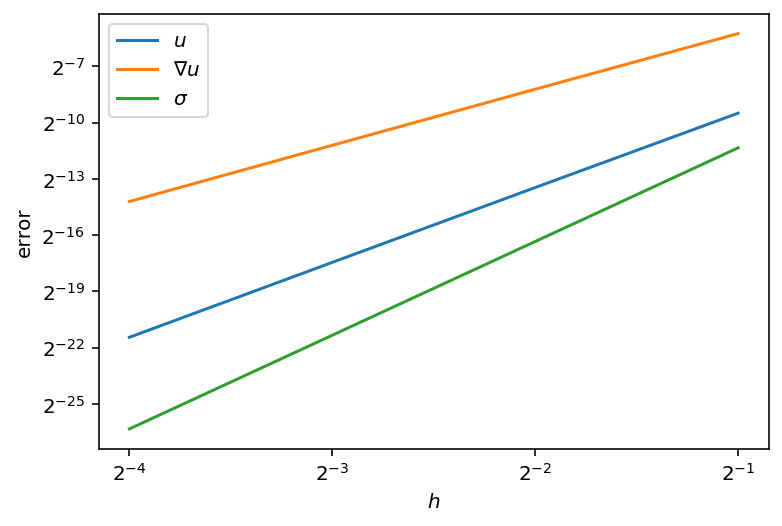

In [4]:
plt.loglog(1/np.array(ns), es, basex=2, basey=2)
plt.legend(['$u$',r'$\nabla u$',r'$\sigma$'])
plt.xlabel('$h$')
plt.ylabel('error')

In [5]:
es

[(0.001388412732957486, 0.026333351600749993, 0.0003851119656405872),
 (8.868080428716618e-05, 0.0033649979540260003, 1.2049451916667002e-05),
 (5.5728996196380784e-06, 0.00042294796919368637, 3.7675547330854804e-07),
 (3.487827756929913e-07, 5.294134267319121e-05, 1.1775442181586632e-08)]

In [6]:
rates = -np.diff(np.log2(es), axis=0)
rates

array([[3.96867084, 2.96821362, 4.99823852],
       [3.99212178, 2.99205353, 4.99919524],
       [3.99802747, 2.99801351, 4.99977533]])